In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import joblib


Fraudulent transactions: 0.17%

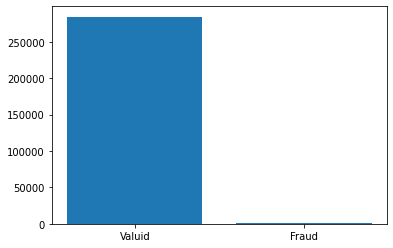

In [2]:
data = pd.read_csv('creditcard.csv')
plt.bar(['Valuid', 'Fraud'], list(data['Class'].value_counts()))
print('Fraudulent transactions: ', end='')
frauds = data['Class'].value_counts()[1]/sum(data['Class'].value_counts())
print(round(frauds*100, 2), end='%')
plt.show()

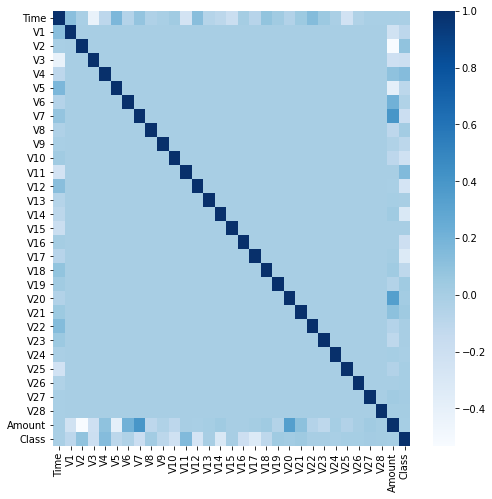

In [8]:
fig = plt.figure(figsize= (8, 8))
sns.heatmap(data.corr(), cmap='Blues')
plt.show()

In [4]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [11]:
filename = 'random_forrest_classifier.sav'
joblib.dump(classifier, filename)

['random_forrest_classifier.sav']

In [6]:
print("Model Accuracy:", round(accuracy_score(Y_test, Y_pred),4))
print("Model Precision:", round(precision_score(Y_test, Y_pred),4))
print("Model Recall:", round(recall_score(Y_test, Y_pred),4))

Model Accuracy: 0.9996
Model Precision: 0.9747
Model Recall: 0.7857


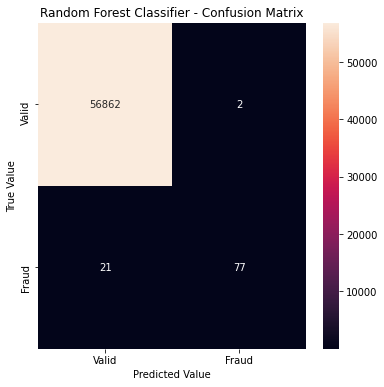

In [7]:
labels = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt='d')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [12]:
loaded_model = joblib.load('random_forrest_classifier.sav')
result = loaded_model.predict(X_test)

In [13]:
print("Model Accuracy:", round(accuracy_score(Y_test, result),4))
print("Model Precision:", round(precision_score(Y_test, result),4))
print("Model Recall:", round(recall_score(Y_test, result),4))

Model Accuracy: 0.9996
Model Precision: 0.9747
Model Recall: 0.7857
